In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Opdrachten bij de Introductie tot de programmeertaal Python -- deel 4: "Machine Learning"

De opdrachten in dit notebook horen bij het vierde deel van de cursus, waarin we Python gebruiken voor machine learning. De meeste van deze opdrachten komen al op de cursusavond aan bod. Ik raad je aan om alle opdrachten waar je niet aan toe komt tijdens de cursus thuis te doen. In sommige gevallen zit er lesmateriaal in wat anders dan in de opdracht niet langskomt in de lesstof.

Alle opdrachten hebben een voorbeeld van een uitwerking die wordt geladen wanneer de cellen met "%load XXX" worden uitgevoerd. Let wel:
- Probeer het eerst zelf! Je leert er pas echt van door te proberen, eventueel te falen en nog een keer te proberen!
- Dit is *een* uitwerking, meerdere varianten zijn waarschijnlijk mogelijk. Overleg bij twijfel gerust met een medecursist, of met de docent!

## Keuzeopdrachten!
Elk opdrachtnummer komt met twee keuzes, a en b. Tijdens de cursus is er slechts tijd genoeg voor 1 van deze, maar kies vooral zelf welke je het meest aanspreekt! Thuis kun je de rest altijd nog eens rustig bekijken.

## 1. Supervised machine learning

Supervised machine learning kent een heel scala aan technieken. In de instructie is al gekeken naar de logistische regressie, een methode om te classificeren. Hiervoor zijn nog meer methoden. Hier kijken we in opdracht 1a naar de beslisbomen, ook wel bekend onder naam decision tree. De dataset over passagiers van de de titanic is voor dit voorbeeld een bekende kandidaat. We maken daarbij meteen kennis met wat "data preparation" tools.

Opgave 1b gaat over lineaire regressie en nearest neighbor regressie. Dit zijn methoden om continue variabelen als target value te "leren" (bijvoorbeeld: schat lichaamsgewicht als je de lichaamslengte weet). Hiervoor wordt een kunstmatige dataset gebruikt die we maken met functionaliteiten uit numpy.


### 1a. Wie overleefde de ramp met de titanic?
In de data directory zit een csv met data over de titanic: titanic3.csv. Lees deze met pandas, en bekijk wat er in zit.

Er zitten een aantal kollommen in die we voortaan zullen negeren. Maak een array die labels heet van de kolom survived en bewaar als features een DataFrame met daarin de volgende kolommen uit de dataset:
- pclass: klasse van de passagies.
- sex: geslacht.
- age: leeftijd.
- sibsp: Aantal broertjes, zusjes en partners aan booord.
- parch: Aantal ouders of kinderen aan boord.
- fare: Het betaalde bedrag.
- embarked: Haven waar is ingestapt (C = Cherbourg; Q = Queenstown; S = Southampton).

pclass, sex en embarked zijn categorische variabelen. Gebruik de pandas functie get_dummies() om van deze kolommen dummy variabelen te maken. Wat gebeurt er daardoor mee? Maak daarna van de DataFrame een array die de features gaan worden voor het training algoritme.

Er blijkt ook nog missende data voor te komen. Hier kunnen we andere data "imputeren". Gebruik daarvoor sklearn.preprocessing.Imputer() (default parameters zijn OK) en fit daarna een instantie van sklearn.tree.DecisionTreeClassifier (ook met default parameters). Hoe goed is de voorspelling?




In [2]:
to_include = os.path.join('uitwerkingen', '4-decisiontree.py') 
# %load $to_include

Deze beslisboom heeft bijzonder veel vertakkingen. Als je het correct hebt gedaan dan ziet deze er als volgt uit:

<img src="decisiontree.png" alt="A complicated tree">

Onleesbaar dus, maar je kunt het plaatje elders openen om te kijken wat er staat.

Maak gebruik van het attribuut feature_importances_ (let op de laatste underscore) om te kijken welke features belangrijk zijn. Waarom is dit niet eenduidig te interpreteren voor deze beslisboom?

Maak daarna gebruik van de opties van de DecisionTreeClassifier om een veel simpelere boom te maken. Probeer de lijst van belangrijke features van onderstaande boom te reproduceren door met hyperparameters van de decision tree te spelen.

<img src="simpletree.png" alt="A simple tree">

Helaas is een van de grote tekortkomingen van Python in machine learning momenteel nog de visualisatie van beslisbomen. Dit is nu nog erg afhankelijk van het besturingssysteem op je computer en we zullen er dus hier niet op ingaan.

In [3]:
to_include = os.path.join('uitwerkingen', '4-simpletree.py') 
# %load $to_include

### 1b. Leren van je buren

We gaan kijken naar een regressieprobleem, waar een lineaire regressie het heel aardig zou doen, maar waar extra karakteristieken in de data zitten die door een lineaire regressie niet opgepikt worden. Eerst maken en visualiseren we de dataset:

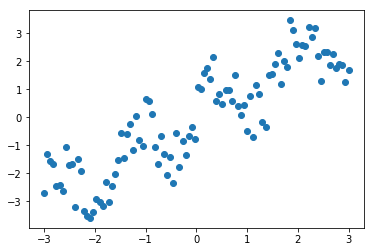

In [4]:
x = np.linspace(-3, 3, 100)            # honderd putten tussen x=-3 and x=3
rng = np.random.RandomState(42)        # Initialiseer een random generator
scatter = rng.uniform(low=-1., high=1., size=len(x))   # Scatter is uniform verdeeld tussen -1 en 1 
y = np.sin(4 * x) + x + scatter        # y varaibele is een lineaire functie, plus een sinus, plus scatter
plt.plot(x, y, 'o');                   # Zo ziet dat eruit!

De lineaire regressie doe ik hier voor, zodat je dat gezien hebt. Ik visualiseer en evalueer ook het resultaat:

Shape van x: (100,)
Shape van X: (100, 1)
Fit coefficienten:  [0.93003279]
y-as intercept:  -0.059638513243581374


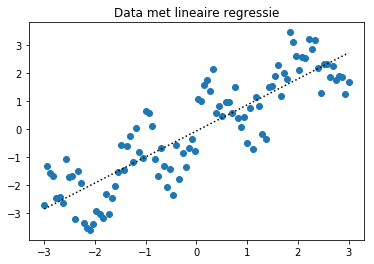

In [5]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()                       # Hyperparameters zijn optioneel in deze stap
X = x[:, np.newaxis]                                 # Numpy trucje om de shape geschikt te krijgen voor sklearn  
print("Shape van x:", np.shape(x))
print("Shape van X:", np.shape(X))

regressor.fit(X, y)                                  # Fit het model
print('Fit coefficienten: ', regressor.coef_)      # coefficienten worden vermenigvuldig met de onafhankelijke variabele
print('y-as intercept: ', regressor.intercept_)    # De intercept wordt apart gefit in dit model
plt.plot(x, y, 'o')
plt.plot(x, regressor.intercept_+regressor.coef_*x, 'k:')
plt.title("Data met lineaire regressie");


In het packet sklearn.neighbors zit een regressor die de k-Nearest Neighbors methode gebruikt. Zoek op wat dat betekent. Kun je een voorspelling doen van wat een lage k en een hoge tot gevolg hebben?

Gebruik deze regressor om een model te trainen en maak daarna een heel fijn verdeelde reeks punten langs de x-as (op een manier die vergelijkbaar is met hoe de data is gegenereerd bijvoorbeeld) om te kijken wat dat doet met de resulterende "fit". 

Maak een plot met de datapunten en de regressie voor verschillende waarden van k.



In [6]:
to_include = os.path.join('uitwerkingen', '4-nearestneighbor.py') 
# %load $to_include

## 2. Unsupervised machine learning

We hebben in de instructie gekeken naar k-means clustering. In de klasse van clusteringalgoritmen kijken we in opgave 2a nog naar niet-sferische clusters met k-means en hoe je problemen daarmee kunt voorkomen door "density-based" en "hierarchische" clustermethoden.

Opgave 2b gaat over de andere klasse van unsupervised learning: dimensiereductie en patroonherkenning. We gebruiken hiervoor Principal Component Analysis, IsoMap en t-SNE. De datasets zullen voor je worden gegenereerd en gevisualiseerd. Je mag zelf aan de slag met de algoritmen!

### 2a. Clustering vervolgd
We hebben KMeans al in werking gezien op blobs. Nu transformeren we de blobs naar langgerekte dingen:

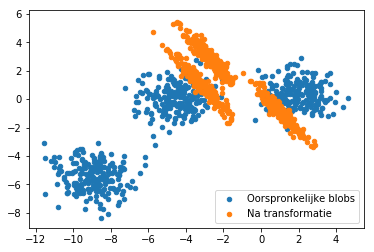

In [7]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=170, n_samples=600)

plt.scatter(X[:, 0], X[:, 1], s=20, label="Oorspronkelijke blobs")

rng = np.random.RandomState(74)
transformation = rng.normal(size=(2, 2))
X = np.dot( X, transformation) # Het is niet heel belangrijk dat je snapt wat hier gebeurt.

plt.scatter(X[:, 0], X[:, 1], s=20, label="Na transformatie")
plt.legend(loc='lower right');


Op deze nieuwe blobs kun je k-means ook los laten. Doe dat, met 3 clusters (of experimenteer wat) en trek je conclusies!

Vergelijk daarna op zowel deze blobs als op de blobs uit het instructienotebook (X1 en X2) de algoritmes DBSCAN (density based) en AgglomerativeClustering (hierarchische clustering).

In [8]:
to_include = os.path.join('uitwerkingen', '4-clustering.py') 
# %load $to_include

### 2b. PCA en manifold learners
Het aantal dimensies van je dataset verkleinen is vaak een goed idee. Niet alleen helpt het bij het visualiseren, maar veel algoritmen zijn ook betrouwbaarder in minder dimensies. Dit is helemaal waar als er in je data gecorreleerde grootheden zitten, wat feitelijk betekent dat als je de 1 kent, dat je ook al een goed idee hebt van de ander. Je kunt dan in principe af met slechts 1 van deze variabelen.

Principal Component Analysis is een techniek om hiermee om te gaan. Beschouw de volgende dataset:


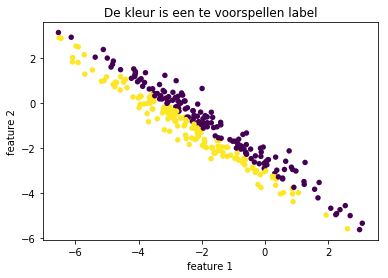

In [9]:
rnd = np.random.RandomState(5)
X_ = rnd.normal(size=(300, 2))
X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2)
y = X_[:, 0] > 0
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y, linewidths=0, s=30)
plt.title("De kleur is een te voorspellen label")
plt.xlabel("feature 1")
plt.ylabel("feature 2");

Het mag duidelijk zijn dat tussen de twee features een lineaire relatie bestaat, waar je verder niks aan hebt. Deze kun je met een lineaire regressie terugvinden en aftrekken, zoals hieronder:

Shape: (300, 2)
Weight coefficients:  [-0.85152914]
y-axis intercept:  -2.7908371815513364


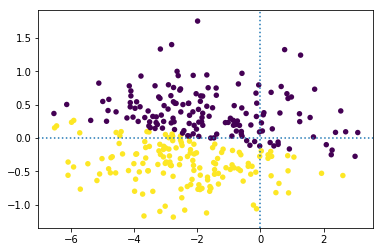

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
print("Shape:", np.shape(X_blob))
regressor.fit(X_blob[:,0].reshape(len(X_blob),1), X_blob[:,1])                                  # Fit the model
print('Weight coefficients: ', regressor.coef_)      # coefficients are multiplied with the indepent variable
print('y-axis intercept: ', regressor.intercept_)    # The intercept is an extra to this model
plt.scatter(X_blob[:,0], X_blob[:,1] - regressor.intercept_ - regressor.coef_*X_blob[:,0], c=y, linewidths=0, s=30)
plt.axvline(0, linestyle='dotted')
plt.axhline(0, linestyle='dotted');

Je ziet al dat de fit niet erg goed was. De oorsprong ligt ook niet in het midden van je data wolk. Bovendien moest je weten dat deze relatie bestond om het te doen. Principal Component Anlysis vindt dergelijke relaties zelf, ook tussen slechts enkele features in een veel grotere set features.

Gebruik Principal Component Analysis (uit sklearn.decomposition) en plot de twee componenten tegen elkaar (het aantal componenten is gelijk aan het aantal features in je dataset).

In [11]:
to_include = os.path.join('uitwerkingen', '4-pca.py') 
# %load $to_include

PCA is krachtig en snel, maar vindt alleen lineaire relaties tussen data en lineaire structuren. Als je pech hebt is je data ingewikkelder. In het onderstaande voorbeeld liggen alle datapunten langs een S-curve. Als de kleur hetgeen is dat voorspeld dient te worden, dan is alleen de locatie "langs" de S van belang.

Gebruik eerst PCA om te kijken wat dat voor resultaat heeft en of dat je helpt. Je kunt daarna ook IsoMap en t-SNE gebruiken (beide uit sklearn.manifold). Het gaat voor nu te ver om in te gaan op de werking van die algoritmes, maar ze zoeken beide naar consistente structuren van willekeurige vorm in een multi-dimensionale ruimte en geven een versimpelde variant, waarin de "nuttige structuur" behouden is in minder dimensies.

Als je tijd en zin hebt kun je onderzoeken hoe lang beide algoritmen erover doen.

In de bonusopgaven van het huiswerk gaan we nog een stukje verder op deze vergelijking in.

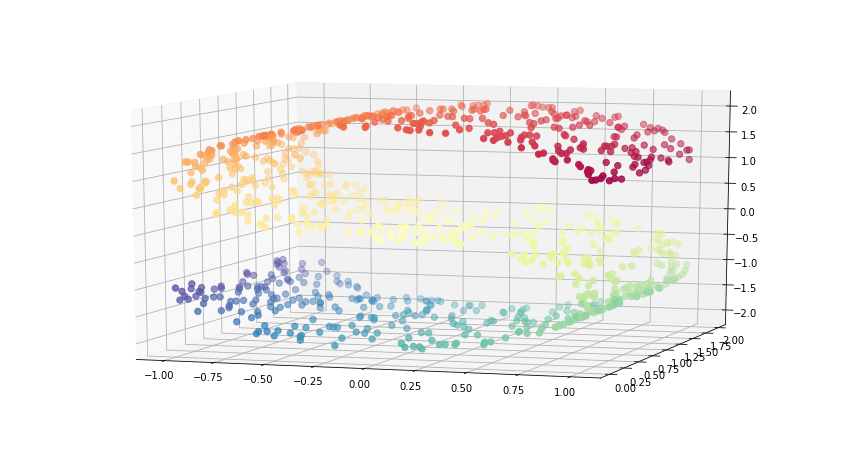

In [12]:
from sklearn.datasets import samples_generator
from mpl_toolkits.mplot3d import Axes3D
n_points = 1000
X, color = samples_generator.make_s_curve(n_points, random_state=0)
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral, s=40)
ax.view_init(10, -72)


In [13]:
to_include = os.path.join('uitwerkingen', '4-Scurve.py') 
# %load $to_include

## 3. Neurale netwerken

Voor het stuk over neurale netwerken zuellen we verder gaan met de MNIST hand-written digits. Opnieuw zijn er twee keuze opdrachten. In 3a. kijken waar naar het gebruik van bottleneck-layers voor dimensiereductie. Een toepassing van auto-encoders als de-noisers (ruisverwijdering uit plaatjes) is het onderwerp van 3b.

### 3a. Dimensiereductie met neurale netwerken.
Een auto-encoder reproduceert de input-laag, maar het is inzichtelijk (en potentieel heel nuttig!) om ook een netwerk met een bottleneck de labels te laten voorspellen. Hieronder proberen we dat voor een bottleneck met slechts twee neuronen.

De data wordt eerst voor je ingeladen, daarna is het aan jou om een netwerk met een bottleneck (met twee neuronen) te trainen. Let op dat je neurale netwerk wel weer grotere lagen krijgt na de bottleneck.

Gebruik daarna ook de "summary" methode om te kijken of je netwerk eruit ziet zoals je verwacht.


In [14]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split

mnist = fetch_mldata("MNIST original", data_home='./data/')  
features, labels = mnist.data / 255., mnist.target

# Het splitsen in een training en test set gebeurt hier. Check de documentatie!
xtr, x, ytr, y = train_test_split(features, labels, test_size=0.3)

print("Dimensies van xtr:", xtr.shape)
print("Dimensies van ytr:", ytr.shape)
print("Dimensies van x:", x.shape)
print("Dimensies van y:", y.shape)

Dimensies van xtr: (49000, 784)
Dimensies van ytr: (49000,)
Dimensies van x: (21000, 784)
Dimensies van y: (21000,)


In [15]:
to_include = os.path.join('uitwerkingen', '4-nn_dimensiereductie.py') 
# %load $to_include

Ik wil hier benadrukken dat 95% van de labels correct is voorspeld (in het voorbeeld in de uitwerking), terwijl er een bottleneck-laag met slechts twee neuronen in het netwerk zit! Die laag heeft slechts 2 outputwaarden, waarna het weer opbouwende netwerk de labels bijna helemaal goed kan voorspellen. *Alle info om de labels te voorspellen ligt dus besloten in die 2 getallen!* 

Bedenk waar dat voor gebruikt kan worden. Door de plaatjes te encoden met de eerste helft van het netwerk (t/m bottleneck) kun je de plaatjes reduceren tot twee getallen. Door het tweede deel van het newterk, de decoder, te gebruiken op deze twee getallen kun je de labels behoorlijk goed reproduceren. 

Aangezien de bottleneck-laag tweedimensionaal is, kun je deze ook goed visualiseren. Het zou hierin evident moeten zijn dat er tien verschillende labels zijn. Er wordt gebruik gemaakt van de backend van keras, die een functie kan definieren die de waarden van verschillende layers in je netwerk naar elkaar mapt (feitelijk maak je hier dus de encoder). Definieer zo'n functie met behulp van tensorflow.keras.backend.function(). Zie de documentatie voor hoe dit werkt.

Plot alle punten in dit tweedimensionale vlak, geef ze een kleur die correspondeert met het echte label en denk goed na over wat je ziet!

In [16]:
to_include = os.path.join('uitwerkingen', '4-nn_dimensiereductieresultaat.py') 
# %load $to_include

**Als je zin en tijd hebt:**

Aangezien dit zo goed werkt, zou het dan ook werken om de plaatjes te reconstrueren met een auto-encoder met een bottleneck-laag van slechts twee neuronen? Probeer het eens!


In [17]:
to_include = os.path.join('uitwerkingen', '4-nn_kleineencoder.py') 
# %load $to_include

### 3b. Een denoising auto-encoder

Maak gebruik van de auto-encoder zoals die in de instructie is langsgekomen. Train deze op "clean" plaatjes van de MNIST cijfers. Voordat je je test set erdoorheen gooit om te zien hoe deze gereconstrueerd worden voeg je er ruis aan toe: elke pixelwaarde wordt verhoogd met een random, klein getal. Bedenk daar zelf een methode voor. Af en toe mag deze waarde best hoog zijn, maar niet te vaak. Visualiseer de plaatjes om jezelf ervan te overtuigen dat wat je gebruikt een handgeschreven getal met een beetje ruis is, en niet vierkantjes vol met voornamelijk ruis.

Probeer nu deze te reconstrueren. Als je tijd over hebt kun je ook experimenteren met het trainen inclusief ruis en kijken wat dat doet. Wat ook interessant kan zijn is zowel een auto-encoder als een classifier (voorspeller van de labels) trainen op de training set zonder ruis en dan van ruizige plaatjes het label voorspellen, zowel met als zonder de-noising. Het tweede stuk uitwerking doet dat.

In [18]:
to_include = os.path.join('uitwerkingen', '4-autoencoder.py') 
# %load $to_include

In [19]:
to_include = os.path.join('uitwerkingen', '4-ruisvoorspelling.py') 
# %load $to_include